<a href="https://colab.research.google.com/github/mrchapagain/SocialNetworkAnalytics/blob/main/TwiteerDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tweeter Data Analytics

***Here I will cover:***
1. *Extract tweet timeline of yours*
2. *Tweets from twetter user*
3. *Tweets # search by keywords*

***Libaries***

In [74]:
# Necessary libaries
from tweepy import OAuthHandler
from tweepy import API
import tweepy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import time

***Tweepy authentication***

In [49]:
#read configs, #import configparser, #config= configparser.ConfigParser(), #config.read('/content/sample_data/config.ipynb')
#Necessary information form tweet account



auth = OAuthHandler(consumer_key, consumer_secret) # Consumer key authentication
auth.set_access_token(access_token, access_token_secret) # Access key authentication
api = API(auth)  # Set up the API with the authentication handler
api.me().screen_name  # just check if it is working

'mrchapagain'

#1.   Extract tweet timeline of yours

***Function for scraping and updating data***

In [162]:
# Function to extact data from twetter user
def extract_timeline_as_df(timeline_list):
  columns = set()
  allowed_types = [str, int]
  tweets_data= []

  for status in timeline_list:
    status_dict= dict(vars(status))
    keys= status_dict.keys()

    single_tweet_data = {'user': status.user.screen_name, 'author': status.user.screen_name}
    
    for k in keys:
      try:
        v_type= type(status_dict[k])
      except:
        v_type = None
      
      if v_type != None:
        if v_type in allowed_types:
          single_tweet_data[k] = status_dict[k]
          columns.add(k) # these are the variable that can extracted data from

    tweets_data.append(single_tweet_data)

  header_cols= list(columns)
  header_cols.append('user')
  header_cols.append('author')
  df= pd.DataFrame(tweets_data, columns= header_cols)
  return df

***Getting actul data with the function difined earlier***

In [51]:
my_timeline= api.home_timeline()
df2= extract_timeline_as_df(my_timeline)
df2.head()

,lang,quoted_status_id,text,favorite_count,id_str,retweet_count,quoted_status_id_str,id,source,source_url,user,author
0,en,NaN,Conference on the Synergies in Research and In...,0,1543560437010137088,0,NaN,1543560437010137088,EUwatch,https://www.euwatch.live,EUwatchers,EUwatchers
1,fr,NaN,L’info du jour | 3 juillet - Mi-journée https:...,0,1543560426935533569,0,NaN,1543560426935533569,EUwatch,https://www.euwatch.live,EUwatchers,EUwatchers
2,fr,NaN,L'Ukraine poursuit la production d'acier malgr...,0,1543560425899425796,0,NaN,1543560425899425796,EUwatch,https://www.euwatch.live,EUwatchers,EUwatchers
3,en,NaN,Germany slams UK's plan to dismantle post-Brex...,0,1543560381121155072,0,NaN,1543560381121155072,EUwatch,https://www.euwatch.live,EUwatchers,EUwatchers
4,ne,NaN,एमबिबिएसलगायत चिकित्सा शिक्षा अध्ययनका लागि वि...,7,1543558146702028801,2,NaN,1543558146702028801,TweetDeck,https://about.twitter.com/products/tweetdeck,setopati,setopati


#2. Tweets from user

***Creating variable to navigate twetter***

In [123]:
# Obtaining tweet from specific user account
def tweets_by_user(user):
  limit=300

  tweets_obj= tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode="extended").items(limit)
  
  # Create Data Frame
  columns= ['Tweets', 'Likes', 'Time', 'User']
  tweets = []
  for i in tweets_obj:
    tweets.append([i.full_text, i.favorite_count, i.created_at, i.user.screen_name])

  df= pd.DataFrame(tweets, columns=columns)
  df['Time']=df['Time'].apply(lambda x: x.strftime('%Y-%m-%d'))
  return df
  

In [127]:
df=tweets_by_user("DRNyheder")
df

,Tweets,Likes,Time,User
0,ANALYSE To Mitch McConnell-tacklinger har bane...,1,2022-07-03,DRNyheder
1,Rusland har fået kontrol over strategisk vigti...,1,2022-07-03,DRNyheder
2,Seneste nyt fra Ukraine: Sidste større by i Lu...,7,2022-07-03,DRNyheder
3,Radikalt bagland er skuffet over nej til advok...,13,2022-07-03,DRNyheder
4,Stigende energipriser tvinger kommune til at h...,0,2022-07-03,DRNyheder
...,...,...,...,...
295,USA ramt af største rentestigning siden 1994 h...,0,2022-06-15,DRNyheder
296,"Trapper, køjesenge og mangel på voksenbleer: U...",13,2022-06-15,DRNyheder
297,Banker lukker for kontanter: Michael har tømt ...,10,2022-06-15,DRNyheder
298,"Minister: Forskerne er i tvivl, om globalt abe...",5,2022-06-15,DRNyheder


***Loading them in Data Frame***

In [89]:
# save them as dataframe by passing variables as a columns
df= df[~df.Tweets.str.contains("RT")].reset_index(drop=True)
#now lets make only tweets thats has not Re-Tweeted!

df.head()

,Tweets,Likes,Time,User
0,ANALYSE To Mitch McConnell-tacklinger har bane...,1,2022-07-03,DRNyheder
1,Rusland har fået kontrol over strategisk vigti...,1,2022-07-03,DRNyheder
2,Seneste nyt fra Ukraine: Sidste større by i Lu...,7,2022-07-03,DRNyheder
3,Radikalt bagland er skuffet over nej til advok...,12,2022-07-03,DRNyheder
4,Stigende energipriser tvinger kommune til at h...,0,2022-07-03,DRNyheder


In [90]:
# Top most liked tweets
mostlike= df.loc[df.Likes.nlargest(5).index].set_index("Tweets")
mostlike

,Likes,Time,User
Tweets,,,
Støttepartier tøver med at lade uvildige advokater vurdere minkrapport: 'Kan bedst betegnes som hykleri' https://t.co/Ry9EjxqRvm https://t.co/JAB32AD4Zn,90,2022-06-29,DRNyheder
Radikalt bagland presser partitop: Advokater skal vurdere om Mette Frederiksen skal for rigsret https://t.co/EUBhvTgKE1 https://t.co/2NjjCvg8YA,72,2022-07-01,DRNyheder
"Inflationen brager løs - og Danmark er blandt de europæiske lande, der hjælper befolkningen mindst https://t.co/KOByf8Xc7k https://t.co/WzASaWeGfX",62,2022-06-19,DRNyheder
Uffe Ellemann-Jensen er død https://t.co/X7ddZjEuiR https://t.co/q7RDaXhT1W,54,2022-06-19,DRNyheder
Seneste nyt fra Ukraine: Zelenskyj vil have Rusland ud af FN's Sikkerhedsråd https://t.co/rgKyeBaJIk https://t.co/mjdnFSXxji,51,2022-06-29,DRNyheder


***Plot the word-colud***

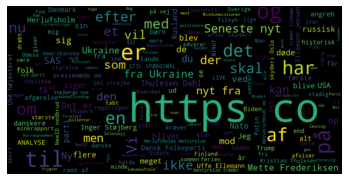

In [149]:
#Plot the word cloud
from wordcloud import WordCloud 
allWords= ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width= 1000, height=500, random_state=21, max_font_size= 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

***Sentiment Analysis***

In [209]:
# Create a function to compute Negetive, Neutral and Positive analysis
import re
from textblob import TextBlob
def SentimentAnalysis(df):
  # first clean the text
  text= df['Tweets']

  def cleanText(text):
    text= re.sub(r'@[A-Za-z0-9]+', '',text) # Removed @mentions
    text= re.sub(r'#', '',text) # the '#' symbol
    text= re.sub(r'RT[\s]+', '',text) # Removed RT
    text= re.sub(r'https?:\/\/\s+', '',text) # Removed the hyper link
    return text

  #clean tweets
  df['Tweets']= df['Tweets'].apply(cleanText)

  #function to get the subjectivity
  def getSubjectivity(text=df['Tweets']):
    return TextBlob(text).sentiment.subjectivity
  #function to ge the polarity
  def getPolarity(text=df['Tweets']):
    return TextBlob(text).sentiment.polarity
  #Create to new columns
  df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
  df['Polarity']= df['Tweets'].apply(getPolarity)

  # Function to sentiment
  def getAnalysis(score):
    if score < 0: return 'Negetive'
    elif score == 0: return 'Neutral'
    else: return 'Positive'

  df['Analysis']= df['Polarity'].apply(getAnalysis)
  #show the data

  return df[["Tweets", "Likes", "Time", "Analysis"]]

In [212]:
SentimentAnalysis(df)

,Tweets,Likes,Time,Analysis
0,ANALYSE To Mitch McConnell-tacklinger har bane...,1,2022-07-03,Neutral
1,Rusland har fået kontrol over strategisk vigti...,1,2022-07-03,Neutral
2,Seneste nyt fra Ukraine: Sidste større by i Lu...,7,2022-07-03,Neutral
3,Radikalt bagland er skuffet over nej til advok...,13,2022-07-03,Neutral
4,Stigende energipriser tvinger kommune til at h...,0,2022-07-03,Neutral
...,...,...,...,...
295,USA ramt af største rentestigning siden 1994 h...,0,2022-06-15,Neutral
296,"Trapper, køjesenge og mangel på voksenbleer: U...",13,2022-06-15,Neutral
297,Banker lukker for kontanter: Michael har tømt ...,10,2022-06-15,Neutral
298,"Minister: Forskerne er i tvivl, om globalt abe...",5,2022-06-15,Neutral


#3.  Tweets search by using Keywords or Hashtag

In [92]:
# Obtaining tweet using keywords or Hastag
def tweets_by_keywords(keywords):
  limit=300

  tweets_obj= tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode="extended").items(limit)
    # Create Data Frame
  columns= ['Tweets', 'Time', 'User']
  tweets = []
  for i in tweets_obj:
    tweets.append([i.full_text, i.created_at, i.user.screen_name])

  df= pd.DataFrame(tweets, columns=columns)
  df['Time']=df['Time'].apply(lambda x: x.strftime('%Y-%m-%d'))
  return df
  


In [93]:
tweets_by_keywords('Alternative protein')

,Tweets,Time,User
0,@Morcia Quark…. Perfect easy food alternative ...,2022-07-03,battle_weary1
1,"RT @ketodietapp: Cheesy Keto ""Popcorn""\n\nThes...",2022-07-03,nkonstas
2,"Cheesy Keto ""Popcorn""\n\nThese light and crunc...",2022-07-03,ketodietapp
3,RT @PaedDietitian: #eaaci2022 high cross react...,2022-07-03,florindanpopesq
4,RT @1__o_o__: Another point on #novelfoods - w...,2022-07-03,florindanpopesq
...,...,...,...
295,Alternative protein predictions for 2050 https...,2022-06-29,ACTAE_asoc
296,RT @mushroomkingsgh: Buy your fresh oyster Mus...,2022-06-29,o_clue
297,RT @mushroomkingsgh: Buy your fresh oyster Mus...,2022-06-29,iddriss862
298,Buy your fresh oyster Mushroom from us:\n\nGre...,2022-06-29,mushroomkingsgh


In [58]:
"""# Lets define the class to scrap tweet data on real time
class Linstener(tweepy.Stream):
  tweets = []
  limit=100

  def on_status(self, status):
    self.tweets.append(status)
    #print(status.user.screen_name + ":" + status.text)

    if len(self.status) == self.limit:
      self.disconnect()

listen = Linstener(api)
stream_tweet = Stream(auth, listen)

# Stream by Keywords
keywords = ['2022', '#python']
stream_tweet.filter(track=keywords)

# Creat data Frame
columns= []
data= []

for tweet in stream_tweet.tweets:
  data.append([tweet.user.screen_name, tweet.text])

  df5= pd.DataFrame(data, columns=columns)
  print(df5)
stream_tweet"""

'# Lets define the class to scrap tweet data on real time\nclass Linstener(tweepy.Stream):\n  tweets = []\n  limit=100\n\n  def on_status(self, status):\n    self.tweets.append(status)\n    #print(status.user.screen_name + ":" + status.text)\n\n    if len(self.status) == self.limit:\n      self.disconnect()\n\nlisten = Linstener(api)\nstream_tweet = Stream(auth, listen)\n\n# Stream by Keywords\nkeywords = [\'2022\', \'#python\']\nstream_tweet.filter(track=keywords)\n\n# Creat data Frame\ncolumns= []\ndata= []\n\nfor tweet in stream_tweet.tweets:\n  data.append([tweet.user.screen_name, tweet.text])\n\n  df5= pd.DataFrame(data, columns=columns)\n  print(df5)\nstream_tweet'

# Visualization with text processing

In [59]:
# Libaries for sentiment analytics (NLP)
import matplotlib.pyplot as plt
import re
import spacy
import seaborn as sns

In [60]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [61]:
# Split all the sentances and creat the list of sentence of from the tweet columns
list_of_sentences = [sentence for sentence in df.Tweets]

lines = []
for sentence in list_of_sentences:
  words = sentence.split()
  for w in words:
    lines.append(w)
print(lines[:20])

['ANALYSE', 'To', 'Mitch', 'McConnell-tacklinger', 'har', 'banet', 'vejen', 'for', "USA's", 'mest', 'konservative', 'højesteret', 'https://t.co/D1lLUNB3ub', 'https://t.co/ABqsZxGlNR', 'Rusland', 'har', 'fået', 'kontrol', 'over', 'strategisk']


In [62]:
# Removing Punctuation by using Regular Expression (RegEx)
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2= []

for word in lines:
  if word != '':
    lines2.append(word)

In [63]:
# Stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem= []
for word in lines2:
  stem.append(s_stemmer.stem(word))

In [64]:
# Removing all the stop words
stem2= []

for word in stem:
  if word not in nlp.Defaults.stop_words:
    stem2.append(word)

In [65]:
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()
df2.head()

er     79
til    66
og     65
p      62
det    50
Name: 0, dtype: int64

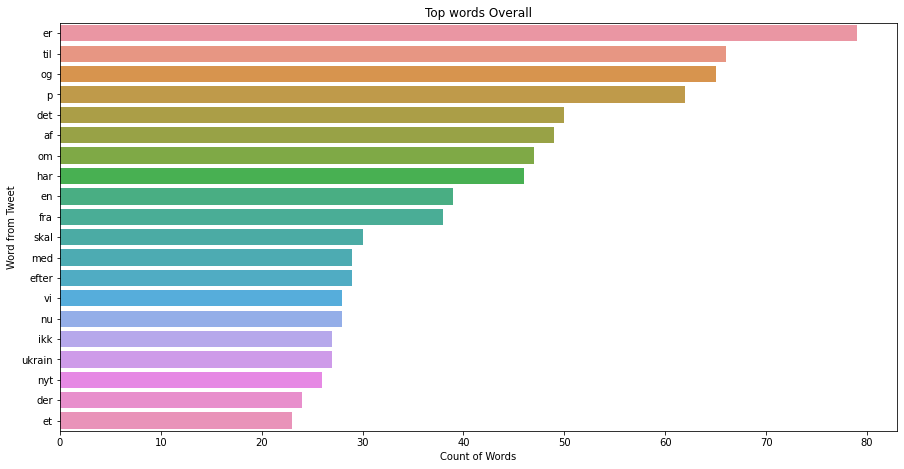

In [66]:
# Visualization
df2= df2[:20,]
plt.figure(figsize=(15,7.5))
sns.barplot(df2.values, df2.index, alpha=1)
plt.title('Top words Overall')
plt.ylabel('Word from Tweet')
plt.xlabel('Count of Words')
plt.show()

In [67]:
# Visualization for mentions organizations
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [68]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()

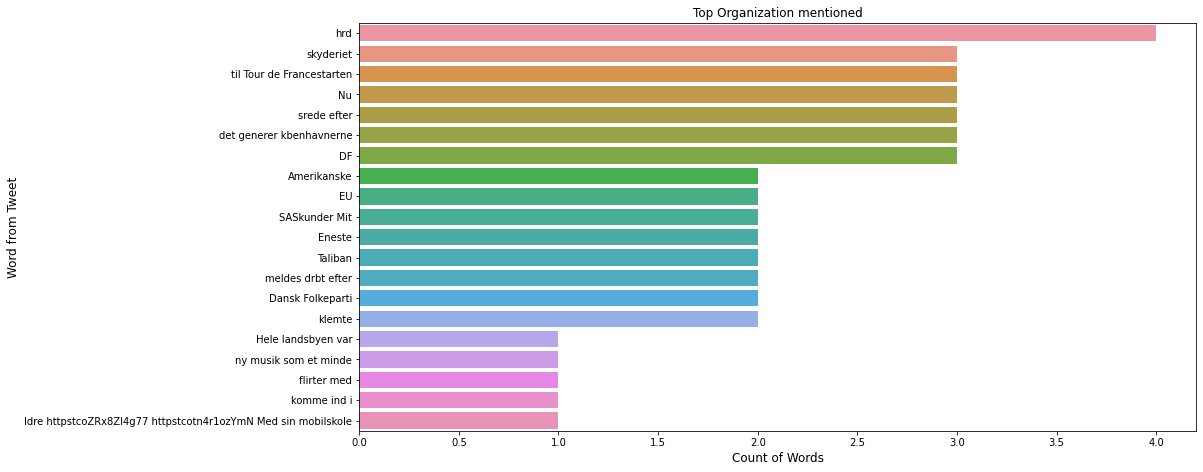

In [69]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top Organization mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [70]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'PERSON')
df7 = df7['Word'].value_counts()

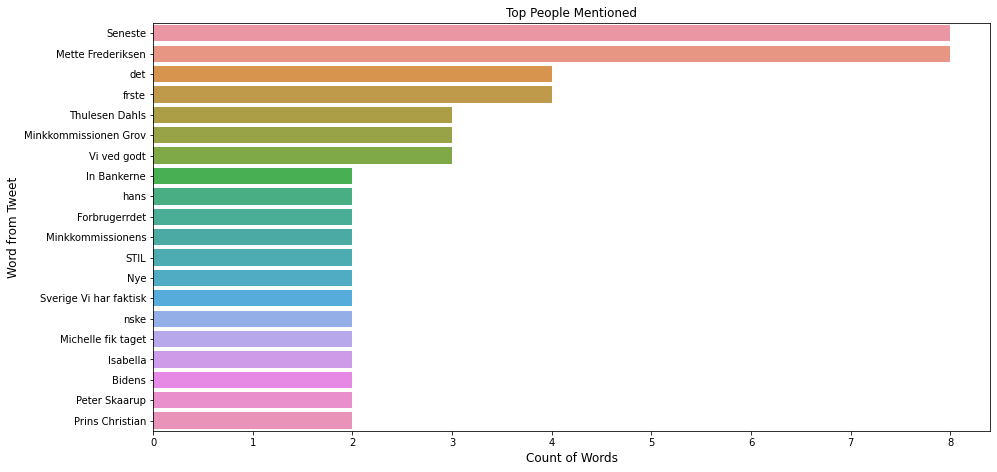

In [71]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()